In [1]:
# -*- encoding: utf-8 -*-

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  # countvertor를 기반으로 tfidf값을 구하는 것
import re
import pyTextMiner as ptm
import numpy as np
import pandas as pd
import nltk

In [6]:
df = pd.read_csv('naver_kakaomini.csv', index_col=0)
df.head()

,카카오미니C 개봉기 사용기 내가 느낀 장단점,2018-12-28 01:15:00,"['카카오미니C 개봉기 사용기 내가 느낀 장단점', '카카오미니C 라고? 생활이 편리해지겠어', '카카오미니c', '안녕하세요 행복한 하루입니다!', '카카오미니C', '다들 아시나요?', '저는 사실 몰랐습니다', '인공지능 스피커는 티비 선전에만 나오는', '남의 것이라고만 생각했었는데요!', '며칠전 남편이 선물받았다며 가지고 온', '카카오미니C 후기를 남겨봅니다^^', '박스가 참 예쁜 카카오미니C입니다', '포스팅 하려고 살펴보니', '기존 인공지능 스피커를 개량?해서 나온 제품이라고하는데요', '며칠전 남편 생일에 친구가 카카오톡으로 ', '선물하기를 해준 모양입니다', '박스를 풀어서 스피커를 만나보도록 할게요!', '짜잔~', '약간 트위드 느낌의 스피커,', '심플하면서 예쁩니다', '살펴보니 야외에서 사용할수 있는', '포터블 밧데리도 있다고하는데요', '추후 맘에 들면 그것도 구입해볼 생각이 있습니다', '정말 심플하게 생긴 버튼도 위쪽에 있습니다', '카카오미니 설명서와', '충전기, 스피커가 끝이랍니다', '마그넷 피규어도 같이 들어있는데요', '라이언이 있었답니다', '쪼꼬만한 라이언 캐릭터 귀여워요', '이것이 어떻게 스피커에 붙느냐..??', '라이언의 팔부분이 자석으로 되어있어서', '찰싹 붙습니다', '하지만 강력한 접착력을 보이지는 않고요', '귀엽게 붙어요', '딸아이 손에 자동적으로 갑니다.', '여기서 단점 하나', '페인트가 좀 묻어난달까요?', '저희 딸아이가', '피규어를 크레파스 사용하듯이', '스피커위쪽으로 그림을 그렸는데요', '페인트가 묻어납니다..', 'ㅜㅜ', '아이 없는집은 상관없지요', '카카오 미니 뒤집어보면 이렇게 생겼어요', '손으로 아이가 짚은 부분은 ', '휴대용 밧데리가 접지되는 부분입니다', '카카오미니를 시행해 볼게요', '노란색 불이 돌아가면서 로딩이 됩니다', '시작하려면 카카오톡 계정을 연결해야하고요', '헤이카카오 앱을 다운받아야한답니다', '구글플레이스토어, 애플 앱스토어에서 받으시면되요', '저는 갤럭시라 구글에서.... 다운..중..', '설치하고,, 계정연결해봅니다', '설치는 정말 쉬워요', '카카오톡을 잘 사용하고 ', '계정설정을 아는분이라면!', '귀엽게 완료한 설정입니다.', '저는 주로 음악을 듣는데 사용하는데요', '헤이카카오~ 불러서 음악틀어줘', '조용한음악틀어줘', '**가수의 ***틀어줘', '핑**의 아기**틀어줘 등등', '왠만한 요구는 다 들어줍니다.', '단!!!!! 멜론가입이 되어있어야 다 들려주고', '멜론가입을 안하면 1분듣기만 됩니다 ㅋㅋ', '(멜론가입한 저...3달은 990원이라길래 결제했습니다 ㅋㅋ)', '아이를 키우는 엄마입장에서 좋았던것은', '저희집 아기가 18갤이고 말은 못하는데요', '엄마의 음성인식으로 작동하고', '버튼을 작동했을때 끄지를 못해서 편합니다', '(집에있는 시디 플레이어는 마구눌러서 끄기일쑤..)', '그리고 주요뉴스말해줘,', '날씨알려줘,', '미세먼지알려줘', '등등', '호기심에 물어보니 잘 대답해줍니다', '(카카오미니 설정시 지역등록을 합니다)', '아기엄마가 써본 카카오미니 장단점을 정리해볼게요', '장점', '아이가 조작하기가 어렵다', '라디오, 음악, 뉴스, 등등 원하는것을 물어본다', '상당히 작은 소리에도 잘 반응한다', '(가끔 엉뚱한 말을 하기도하지만..)', '음악 들을때 알아서 자동선곡', '곡전환이 쉽고 곡 보유가 참 많다', '단점', '음악을 들으려면 멜론가입이필요', '(블루투스도 가능하다고하는데 안해봤음)', '아이가 피규어를 가지고 장난친다', '(스피커위에 줄그어놨음)', '인공지능 스피커는 처음이라..', '신기함 반 설렘반으로 만났는데요', '저는 음악듣는용으로(주로 아기동요) 사용하고', '간간히 궁금한거 물어보면서 심심풀이합니다', '도움이 되셨으면 좋겠네요 ㅋㅋ']"
['https://blog.naver.com/pinky24?Redirect=Log&logNo=221428773471'],,,
['https://blog.naver.com/syokolla?Redirect=Log&logNo=221474510797'],딜라이브플러스UHD 카카오미니 언제 어디서든 드라마 영화를 보자!,2019-02-25 17:57:00,"['딜라이브플러스UHD 카카오미니 언제 어디서든 드라마 영화를 보자!', '안녕하세..."
['https://blog.naver.com/chyung1505?Redirect=Log&logNo=221417156100'],딜라이브플러스UHD와 카카오미니로 넷플릭스 즐기기~,2018-12-11 19:13:00,"['스마트하게 살아보자 싶으면 항상 약정에 매여있을 수밖엔 없는... 시스템이', ..."
['http://cheonching.com/221439084555'],AI 스피커로 유용한 카카오 미니C,2019-01-11 07:00:00,"['AI 스피커로 유용한 카카오 미니C ', ' 블루투스 스피커에 AI 서비..."
['https://blog.naver.com/godlovedmsal?Redirect=Log&logNo=221474688732'],2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박,2019-02-25 22:00:00,"['2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박', '2월 예스24굿즈 ..."
['https://blog.naver.com/yenavant?Redirect=Log&logNo=221461951927'],"카카오미니 ,인공지능 스피커 엄청 똑똑하네???!! (기능 알아보기)",2019-02-09 23:45:00,"['카카오미니 ,인공지능 스피커 엄청 똑똑하네???!! (기능 알아보기)', '안녕..."


## 전처리

In [8]:
df.iloc[3].isna().sum()

0

In [10]:
data = df.iloc[3].dropna()

In [11]:
for i in range(len(data)):
    try:
        data[i] = re.sub('\n',' ',data[i])
    except:
        pass
print(data[0])

2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박


In [12]:
data.tail()

카카오미니C 개봉기 사용기 내가 느낀 장단점                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [13]:
data.head()

카카오미니C 개봉기 사용기 내가 느낀 장단점                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [15]:
new_data = ''
for i in range(len(data)):
    try:
        new_data = new_data+ '' +data[i]
    except:
        pass
print(new_data)

2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박2019-02-25 22:00:00['2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박', '2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박', '안녕하세요, 윈클레아에요.', '아이 어린이집 보내면 시간적 여유가 있을 줄 알았는데 ㅠㅠ', '어린이집 다니기 시작한 주부터 목이 안돌아가서 라인이 얼집 등원시키고 한의원으로 저도 매일 등원했고 ;', '그 다음주에는 아쿠아리움에 코엑스 베페 등으로 바빠서 쉼이 없고...', '이번주에는 라인이 감기에 저도 감기 몸살 .......', '진짜 해외여행 다녀오고 바로 설날이라 정신 없었는데 이래저래 하다보니 한달이 후딱 지나가네요.', '주변에서 다들 저보고 쉼이 필요하다고.', '일도 조금 줄이고, 마음의 안정을 취하는게 필요하겠다고 하더라구요.', '남들이 보기에도 내가 너무 무리하나 싶어서 한동안은 쉬엄쉬엄 하려구요~^^', '아이가 어린이집 가있는 시간을 어떻게 유용하게 활용할까 하다가 취미생활 하나 만들면 좋겠다 싶더라구요.', '물론 지금까지 읽어야지~ 하며 야금야금 사놓았던 책들도 읽구요 :)', '예스24에서 주문한 책들 !!!', '그림에 관심이 있었던지라 취미생활하려고 주문했고~', '워낙 유명한 수미네반찬 ! 이것도 주문했어요.', '위대한개츠비와 아이에게 어떻게 말과 행동을 해야될지 고민인 저에게 필요한 책도 주문했어요.', '나도 수채화 잘 그리면 소원이 없겠네', '라인이 뱃속에 임신해있을 때 집앞에서 색연필 원데이 클래스 진행했었거든요~', '그당시에 끄적이면서 내가 작품을 만드니 뭔가 마음이 뿌듯하기도 하고,', '그 시간동안은 다른 생각 없이 집중 할 수 있으니 좋더라구요.', '또한 수채화 잘 그리면 나중에 아이한테 알려주기에도 좋을 것 같구요 ㅎㅎ', '하루 30분씩 총 20일 !', '수채화와 친해지는 시간을 매일 가지면', '저도 책속의 있는 작품들을 그릴 수 있을까요?^^', '수채화 그림을 그리려면 제일 먼저 

In [17]:
with open('kakaomini.txt','w', -1, "utf-8") as f:
    f.write(new_data)

In [19]:
pipeline = ptm.Pipeline(ptm.splitter.NLTK(),
                        ptm.tokenizer.Komoran(),
                        ptm.helper.POSFilter('NN*'),
                        ptm.helper.SelectWordOnly(),
                        ptm.helper.StopwordFilter(file='stopwordsKor.txt'))
#                         ptm.counter.WordCounter())
corpus = ptm.CorpusFromFile('kakaomini.txt')
result = pipeline.processCorpus(corpus)
print('== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 + 빈도분석 ==')
print(result)

== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 + 빈도분석 ==
[[['2월', '카카오프렌즈', '미니', '크로스', '백', '사은품', '대박', '2월', '카카오프렌즈', '미니', '크로스', '백', '사은품', '대박', '2월', '카카오프렌즈', '미니', '크로스', '백', '사은품', '대박', '안녕하세요', '윈', '레아'], ['아이', '어린이집', '여유', '어린이집', '시작', '목이', '라인', '얼', '등원', '한의원', '등원', '코엑스', '이번', '라인', '감기', '감기', '몸살', '진짜', '해외여행', '설날', '정신', '달'], ['주변', '필요'], ['마음', '안정', '필요'], ['남', '무리', '한동안', '아이', '어린이집', '활용', '취미', '생활'], ['책', '예스', '24', '주문', '책', '!!!'], ['그림', '관심', '취미', '생활', '주문', '수미', '반찬'], ['주문'], ['아이', '행동', '고민', '필요', '책', '주문'], ['수채화', '소원', '라인', '뱃속', '임신', '색연필', '데이', '클래스', '진행', '당시', '작품', '마음', '집중'], ['수채화', '나중', '아이', '하루'], ['수채화', '해지', '저도', '책', '작품', '그릴', '수채화', '그림', '제일', '도구', '필요'], ['물감', '붓', '수채화', '용지', '하든', '준비물', '거', '고민', '작가', '추천', '주문', '붓', '사용법', '물', '파트', '색연필', '그림', '수채화', '물', '사용', '물감', '농도'], ['번지', '기와', '라', '데이', '션', '방법'], ['수채화', '라인', '이랑', '물감', '그림', '그릴', '부분', '활용', '수미', '반찬', '수미', '반찬'], ['책', '주문',

# To make wordcloud

In [20]:
tot_wordlist = []
for i in result[:]:
    for j in i[:]:
        tot_wordlist.extend(j)
tot_wordlist

['2월',
 '카카오프렌즈',
 '미니',
 '크로스',
 '백',
 '사은품',
 '대박',
 '2월',
 '카카오프렌즈',
 '미니',
 '크로스',
 '백',
 '사은품',
 '대박',
 '2월',
 '카카오프렌즈',
 '미니',
 '크로스',
 '백',
 '사은품',
 '대박',
 '안녕하세요',
 '윈',
 '레아',
 '아이',
 '어린이집',
 '여유',
 '어린이집',
 '시작',
 '목이',
 '라인',
 '얼',
 '등원',
 '한의원',
 '등원',
 '코엑스',
 '이번',
 '라인',
 '감기',
 '감기',
 '몸살',
 '진짜',
 '해외여행',
 '설날',
 '정신',
 '달',
 '주변',
 '필요',
 '마음',
 '안정',
 '필요',
 '남',
 '무리',
 '한동안',
 '아이',
 '어린이집',
 '활용',
 '취미',
 '생활',
 '책',
 '예스',
 '24',
 '주문',
 '책',
 '!!!',
 '그림',
 '관심',
 '취미',
 '생활',
 '주문',
 '수미',
 '반찬',
 '주문',
 '아이',
 '행동',
 '고민',
 '필요',
 '책',
 '주문',
 '수채화',
 '소원',
 '라인',
 '뱃속',
 '임신',
 '색연필',
 '데이',
 '클래스',
 '진행',
 '당시',
 '작품',
 '마음',
 '집중',
 '수채화',
 '나중',
 '아이',
 '하루',
 '수채화',
 '해지',
 '저도',
 '책',
 '작품',
 '그릴',
 '수채화',
 '그림',
 '제일',
 '도구',
 '필요',
 '물감',
 '붓',
 '수채화',
 '용지',
 '하든',
 '준비물',
 '거',
 '고민',
 '작가',
 '추천',
 '주문',
 '붓',
 '사용법',
 '물',
 '파트',
 '색연필',
 '그림',
 '수채화',
 '물',
 '사용',
 '물감',
 '농도',
 '번지',
 '기와',
 '라',
 '데이',
 '션',
 '방법',
 '수채화',
 '라인',
 '이랑',
 '물감',


In [22]:
ko = nltk.Text(tot_wordlist, name='')
ko.vocab().most_common(50)

[('아이', 15),
 ('주문', 11),
 ('책', 10),
 ('반찬', 9),
 ('라인', 8),
 ('수채화', 7),
 ('마음', 6),
 ('수미', 6),
 ('김수미', 6),
 ('카카오프렌즈', 5),
 ('미니', 5),
 ('크로스', 5),
 ('백', 5),
 ('사은품', 5),
 ('행동', 5),
 ('뇌', 5),
 ('2월', 4),
 ('대박', 4),
 ('어린이집', 4),
 ('필요', 4),
 ('그림', 4),
 ('이번', 3),
 ('활용', 3),
 ('!!!', 3),
 ('물감', 3),
 ('거', 3),
 ('요리', 3),
 ('레시', 3),
 ('피', 3),
 ('표', 3),
 ('묵', 3),
 ('은지', 3),
 ('볶음', 3),
 ('간장', 3),
 ('게장', 3),
 ('등원', 2),
 ('감기', 2),
 ('진짜', 2),
 ('주변', 2),
 ('남', 2),
 ('취미', 2),
 ('생활', 2),
 ('예스', 2),
 ('24', 2),
 ('고민', 2),
 ('색연필', 2),
 ('데이', 2),
 ('작품', 2),
 ('저도', 2),
 ('그릴', 2)]

In [23]:
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud

In [24]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_201.jdk/Contents/Home/bin/apt" (-1)


In [30]:
import platform
from matplotlib import font_manager, rc

# 그래프 그릴 때 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system… sorry~~~')

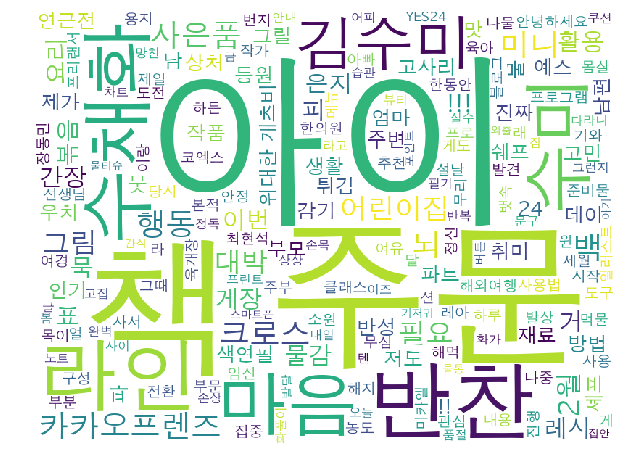

In [31]:
data = ko.vocab().most_common(500)
tmp_data = dict(data)

wordcloud = WordCloud(font_path=font_path, background_color='white',
                     width=800, height=600).generate_from_frequencies(tmp_data)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()